In [287]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

DATAIN='../arosa_data/'
DATASET_FILENAME='arosa_data_feature1.csv'

In [316]:
path_in = DATAIN
file_name = DATASET_FILENAME

df = pd.read_csv(os.path.join(path_in, file_name), delimiter=';')
df.head()

,Datum,Wochentag,TagNr,WocheNr,isFreiZH,isFreiSG,isFreiGR,isFerienZH,Ferien Desc ZH,IsFerienZH_plus3,...,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,isHumorfestival,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,1,53,1,1,1,0,NaN,0,...,0.81,1.3,2.6,1.1,0,0,10,20,5,35
1,02.01.2016,Samstag,2,53,1,1,1,0,NaN,0,...,1.21,1.9,5.4,0.0,0,0,78,59,22,159
2,03.01.2016,Sonntag,3,53,1,1,1,0,NaN,0,...,0.23,0.0,5.9,0.0,0,0,0,0,0,0
3,04.01.2016,Montag,4,1,0,0,0,0,NaN,0,...,0.13,0.3,2.4,0.0,0,0,0,0,0,0
4,05.01.2016,Dienstag,5,1,0,0,0,0,NaN,0,...,0.00,0.0,3.4,1.3,0,0,0,0,0,0


In [317]:
# do preprocessing
oneToHotCols = ['Ferien Desc ZH','Ferien Desc SG','Ferien Desc GR','Feiertag Desc','Wochentag']
df = pd.get_dummies(df, columns=oneToHotCols)

print('The shape of our features is:', df.shape)

The shape of our features is: (1339, 108)


In [318]:
df.loc[df['Mail']!=0].shape
df.loc[df['Schalter']!=0].shape
df.loc[df['Total Anfragen']!=0].shape
df.loc[df['Tel']!=0].shape

(1168, 108)

In [319]:
features = list(df)
target_variables = ['Mail','Schalter','Tel','Total Anfragen']
for tv in target_variables:
    df = df.loc[df[tv]!=0]
    features.remove(tv)
    
#features.remove('TagNr')
#features.remove('Datum')
    
X, y = df[features],df[target_variables]

In [320]:
print('Now the shape of our features is:', X.shape)
print('Now tThe shape of our target variables is:', y.shape)
nulls_per_column = X.isnull().sum()
#print(nulls_per_column)

Now the shape of our features is: (1159, 104)
Now tThe shape of our target variables is: (1159, 4)


In [321]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.3, random_state=123)

In [322]:
# store dates in dataframe and remove from train, test and validation
dates_xtrain = X_train['Datum']
dates_xtest = X_test['Datum']
dates_xval = X_val['Datum']


X_train = X_train.drop("Datum", axis=1)
X_test = X_test.drop("Datum", axis=1)
X_val = X_val.drop("Datum", axis=1)
features.remove('Datum')
#X_test.remove('Datum')
#X_val.remove('Datum')

In [323]:
print('The shape of our X_train is:', X_train.shape)
print('The shape of our X_test variables is:', X_test.shape)
print('The shape of our X_val variables is:', X_val.shape)
print('The shape of our y_train is:', y_train.shape)
print('The shape of our y_test variables is:', y_test.shape)
print('The shape of our y_val variables is:', y_val.shape)

The shape of our X_train is: (927, 103)
The shape of our X_test variables is: (162, 103)
The shape of our X_val variables is: (70, 103)
The shape of our y_train is: (927, 4)
The shape of our y_test variables is: (162, 4)
The shape of our y_val variables is: (70, 4)


In [324]:
# set parameters for random forest model
ntrees = 1000
bootstrap = True

# define model regressor
rf_reg = RandomForestRegressor(n_estimators=ntrees, bootstrap = bootstrap, random_state = 123)

In [325]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_reg.fit(X_train,y_train)

predictions = rf_reg.predict(X_val)

In [326]:
# Calculate the absolute errors
errors = abs(predictions - y_val)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

# Print out the mean absolute error (mae)
print('*'*30)
print('Mean Absolute Error:\n', round(np.mean(errors), 2), 'degrees.')
print('*'*30)
print('Accuracy:\n', round(accuracy, 2), '%.')
print('*'*30)
print('Mean Squared Error:', mean_squared_error(y_val, predictions))
print('*'*30)
print('Score:', rf_reg.score(X_test, y_test))
print('*'*30)

******************************
Mean Absolute Error:
 Mail               6.91
Schalter          15.71
Tel                7.76
Total Anfragen    23.67
dtype: float64 degrees.
******************************
Accuracy:
 Mail              52.91
Schalter          45.38
Tel               71.46
Total Anfragen    72.70
dtype: float64 %.
******************************
Mean Squared Error: 461.8020257285713
******************************
Score: 0.5573488636793333
******************************


In [346]:
# Get numerical feature importances
importances = list(rf_reg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TagNr                Importance: 0.2
Variable: Ferien Desc GR_Sommerferien Importance: 0.18
Variable: WocheNr              Importance: 0.09
Variable: snow_depth_cm_avg    Importance: 0.06
Variable: t_2m_c_avg           Importance: 0.04
Variable: wind_gusts_10m_ms_max Importance: 0.04
Variable: t_max_2m_24h_c_max   Importance: 0.04
Variable: t_min_2m_24h_c_min   Importance: 0.04
Variable: wind_speed_10m_ms_max Importance: 0.03
Variable: wind_speed_mean_10m_24h_ms_avg Importance: 0.03
Variable: wind_speed_mean_10m_1h_ms_avg Importance: 0.03
Variable: visibility_m_avg     Importance: 0.02
Variable: prob_tstorm_1h_p_avg Importance: 0.02
Variable: weather_symbol_1h_idx_spe Importance: 0.02
Variable: Wochentag_Sonntag    Importance: 0.02
Variable: isFreiZH             Importance: 0.01
Variable: isFreiSG             Importance: 0.01
Variable: precip_24h_mm_max    Importance: 0.01
Variable: Ferien Desc SG_Sommerferien Importance: 0.01
Variable: Feiertag Desc_Silvester Importance: 0.0

Text(0,0.5,'Predictions')

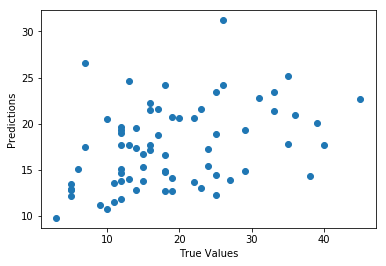

In [328]:
plt.scatter(y_val['Mail'], predictions[:,0])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [358]:
# create pandas dataframe from predictions
pred_values = pd.DataFrame(data=predictions,    # values
             #index=predictions[1:,0],    # 1st column as index
             columns=target_variables)  # 1st row as the column names


In [364]:
dates_xval = pd.DataFrame(data=dates_xval,    # values
             #index=predictions[1:,0],    # 1st column as index
             columns=['Datum'])  # 1st row as the column names
dates_xval = dates_xval.reset_index(drop=True)

In [369]:
pred_pd.head()

,Mail,Schalter,Tel,Total Anfragen
0,14.337,29.221,16.585,60.143
1,20.228,38.484,31.594,88.575
2,19.820,36.020,30.381,85.566
3,22.483,48.750,44.491,115.310
4,16.107,127.847,30.711,174.665


In [370]:
dates_xval.head()

,Datum
0,20.01.2019
1,31.01.2018
2,16.01.2019
3,13.01.2017
4,20.08.2016


In [371]:
result = pd.concat([dates_xval, pred_pd], axis=1, sort=True)
result.head()

,Datum,Mail,Schalter,Tel,Total Anfragen
0,20.01.2019,14.337,29.221,16.585,60.143
1,31.01.2018,20.228,38.484,31.594,88.575
2,16.01.2019,19.820,36.020,30.381,85.566
3,13.01.2017,22.483,48.750,44.491,115.310
4,20.08.2016,16.107,127.847,30.711,174.665


In [398]:
file_name_pred = '../arosa_app/predictions/model_2019_8.csv'
result.to_csv(path_or_buf=file_name_pred,sep=';',index=False, header=True)

None
